In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import cv2
import numpy as np

In [4]:
path='C:\\Users\\hp\\Desktop\\CK+48'
img_data=[]
cnt=0
labels=[]
#labels = np.ones((img_data.shape[0],),dtype='int64')
for i in os.listdir(path):
    for j in os.listdir(path+'\\'+i):
        img=cv2.imread(path+'\\'+i+'\\'+j)
        img_resize=cv2.resize(img,(128,128))
        img_data.append(img_resize)
        labels.append(cnt)
    cnt+=1
img_data = np.array(img_data)
#img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

(981, 128, 128, 3)

In [5]:
labels=np.array(labels)
labels.shape

(981,)

In [6]:
num_classes = 7

names = ['ANGRY','CONTEMPT','DISGUST','FEAR','HAPPY','SAD','SURPRISE']

In [48]:
rows_per_mood=[]
for i in range(7):
    rows_per_mood.append(len(labels[labels==i]))

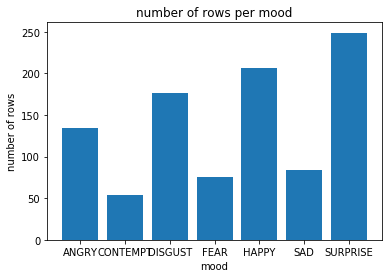

In [49]:
plt.bar(names,rows_per_mood) 
plt.xlabel('mood') 
plt.ylabel('Number of rows') 
plt.title('Number of rows per mood') 
plt.show() 

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2)

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(x_train, y_train, validation_split=0.33, epochs=50, callbacks=callbacks_list, verbose=0)
  
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Epoch 00001: val_accuracy improved from -inf to 0.38224, saving model to weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.38224 to 0.44015, saving model to weights.best.hdf5

Epoch 00003: val_accuracy did not improve from 0.44015

Epoch 00004: val_accuracy did not improve from 0.44015

Epoch 00005: val_accuracy did not improve from 0.44015

Epoch 00006: val_accuracy did not improve from 0.44015

Epoch 00007: val_accuracy improved from 0.44015 to 0.52896, saving model to weights.best.hdf5

Epoch 00008: val_accuracy did not improve from 0.52896

Epoch 00009: val_accuracy improved from 0.52896 to 0.54826, saving model to weights.best.hdf5

Epoch 00010: val_accuracy improved from 0.54826 to 0.61776, saving model to weights.best.hdf5

Epoch 00011: val_accuracy did not improve from 0.61776

Epoch 00012: val_accuracy did not improve from 0.61776

Epoch 00013: val_accuracy did not improve from 0.61776

Epoch 00014: val_accuracy did not improve from 0.61776

Epoch 00015: val_accura

In [69]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

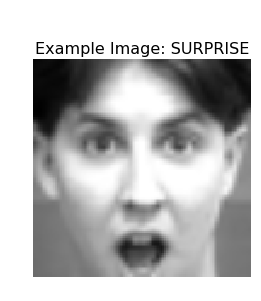

In [58]:
import matplotlib.pyplot as plt
def show(idx, title):
    plt.figure()
    plt.imshow(x_test[idx].reshape(128,128,3))
    plt.axis('off')
    plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(x_test)-1)
for i in range(len(y_test[rando])):
    if y_test[rando][i]==1.0:
        index=i
        break

show(rando, 'Example Image: {}'.format(names[index]))

In [59]:
pred=model.predict(x_test)

In [60]:
def actual(j):
    for i in range(len(y_test[0])):
        if y_test[j][i]==1.0:
            index1=i
            return (names[index1])
            break

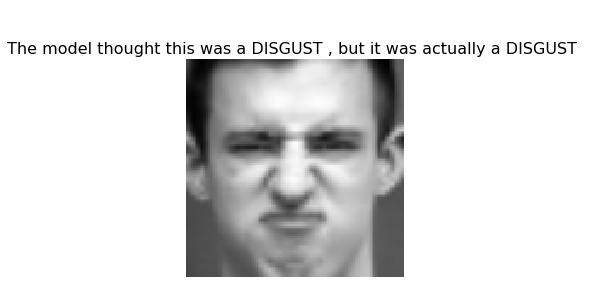

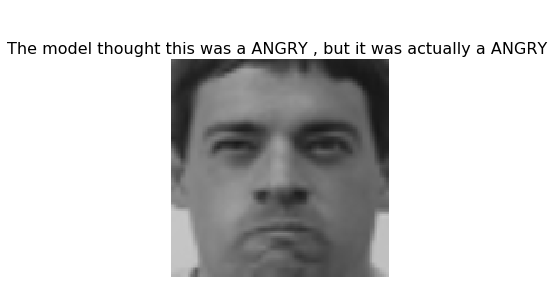

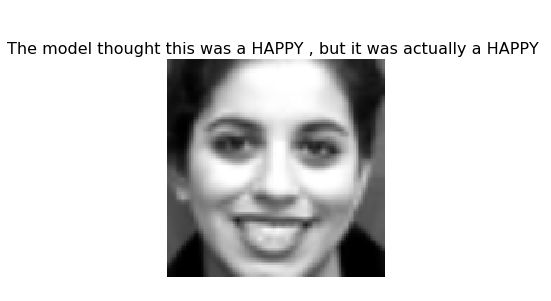

In [61]:
for i in range(0,3):
    show(i, 'The model thought this was a {} , but it was actually a {} '.format(
    names[np.argmax(pred[i])], actual(i)))

ANGRY


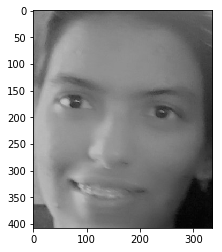

In [86]:
my_img=cv2.imread('C:\\Users\\hp\\Pictures\\IMG_20200328_223200 (3).png')
plt.imshow(my_img)
my_img=cv2.resize(my_img,(128,128))
my_img_data = np.array(my_img)
my_img_data = my_img_data/255
my_img_data = my_img_data.reshape(1,128,128,3)
my_pred=model.predict(my_img_data)
print (names[np.argmax(my_pred[0])])